# Plotting

In [1]:
library(devtools)
library(dplyr)
library(ggplot2)
library(repr)
library(gdscIC50)
library(gdscdata)
data("gdsc_nlme_stats")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
library(readr)
library(ggplot2)

First Read in the GDSC data that we have filtered.

In [2]:
gdsc_useful <- readRDS('gdsc_useful.rds')

In [3]:
head(gdsc_useful)

CL,CELL_LINE_NAME,maxc,DRUG_ID_lib,drug,IC50,rel_IC50,EFFECT
683665,MC-CAR,2e+03,1001,1001_2000,5.248496,0.09513990,TRUE
683665,MC-CAR,1e-01,1003,1003_0.1,-4.526487,0.10818620,TRUE
683665,MC-CAR,1e-01,1004,1004_0.1,-5.123115,0.05957439,TRUE
683665,MC-CAR,2e+00,1006,1006_2,-2.955254,0.02603271,TRUE
683665,MC-CAR,5e-01,1010,1010_0.5,1.575241,9.66381402,FALSE
683665,MC-CAR,2e+00,1011,1011_2,-3.773649,0.01148405,TRUE


Then we get the trials for drug 1014.

In [4]:
gdsc_1014 <- gdsc_useful %>% filter(DRUG_ID_lib==1014)

In [5]:
gdsc_1014_effective <- gdsc_1014 %>% filter(EFFECT==TRUE)

In [6]:
gdsc_1014_ineffective <- gdsc_1014 %>% filter(EFFECT==FALSE)

In [7]:
head(gdsc_1014_effective)

CL,CELL_LINE_NAME,maxc,DRUG_ID_lib,drug,IC50,rel_IC50,EFFECT
687457,SW780,5,1014,1014_5,-0.1946045,0.16463203,TRUE
687592,YKG-1,5,1014,1014_5,-0.1393582,0.17398327,TRUE
687794,NCI-H1437,5,1014,1014_5,-0.8212535,0.08797598,TRUE
687820,NCI-H2347,5,1014,1014_5,-0.5674435,0.11339461,TRUE
724825,NCI-H929,5,1014,1014_5,-0.2340407,0.15826591,TRUE
724828,SK-N-AS,5,1014,1014_5,-0.4204003,0.13135677,TRUE


Following is an example of plotting an Intensity-Dose fitting curve.

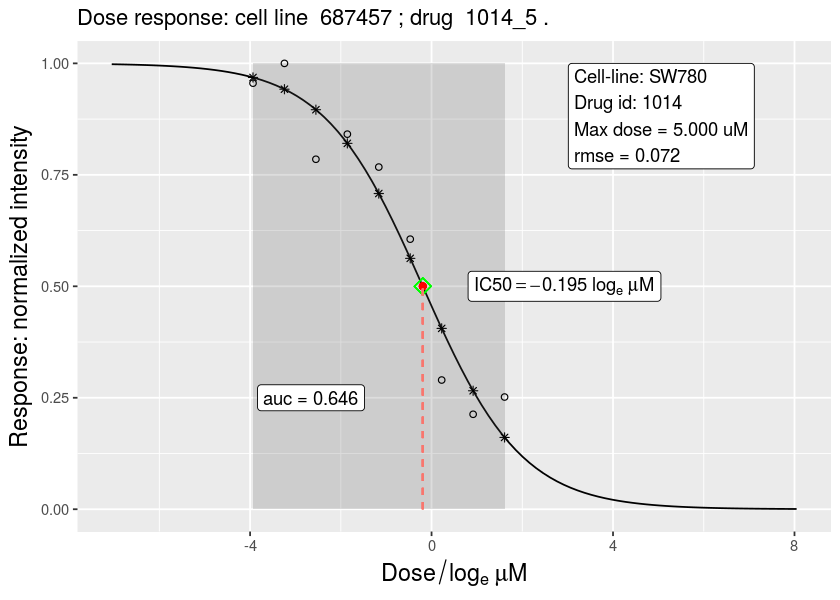

In [3]:
options(repr.plot.width=7,repr.plot.height=5)
plotResponse(model_stats=gdsc_nlme_stats,cell_line='687457',drug_identifier='1014_5')

Next block is intended to generate a plot for every observation and store them to a designated folder. However it is not successful yet.

In [21]:
for (i in 1:nrow(gdsc_1014_effective)){
    CL = gdsc_1014_effective[i,'CL'][[1]]
    drug = gdsc_1014_effective[i,'drug'][[1]]
    fname = paste(c(CL,drug),collapse='_')
    fname = paste(c(fname,'.pdf'),collapse='')
    fname = paste(c('Effective_1014',fname),collapse='/')
    pdf(fname,width=7,height=5,paper='special')
    plotResponse(model_stats=gdsc_nlme_stats,cell_line=toString(CL),drug_identifier=drug)
    dev.off()
}

Next we read in the gene expression data.

In [31]:
gene_exp <- read_tsv('sanger1018_brainarray_ensemblgene_rma.txt')
dim(gene_exp)

Warning message:
“Duplicated column names deduplicated: '1503362' => '1503362_1' [845], '1330983' => '1330983_1' [906], '909976' => '909976_1' [1008], '905954' => '905954_1' [1019]”Parsed with column specification:
cols(
  .default = col_double(),
  ensembl_gene = col_character()
)
See spec(...) for full column specifications.


[1] 17737  1019

Columns are the cell lines and the rows are the genes. We extract the row labels from the original dataframe.

In [32]:
genes <- gene_exp$ensembl_gene
gene_exp <- gene_exp[,-1]

We are only interested in the cell lines that appear in both the GDSC data and gene expression data.

In [33]:
use.cols <- intersect(unique(gdsc_useful$CL),colnames(gene_exp))

In [29]:
length(use.cols)

[1] 954

In [34]:
gene_exp <- gene_exp[,use.cols]
gene_exp <- as.data.frame(t(gene_exp))

In [35]:
colnames(gene_exp) <- genes

In [37]:
dim(gene_exp)
gene_exp[1:6,1:6]

[1]   954 17737

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938
683665,3.238273,2.982254,10.235491,4.856061,4.078870,9.116236
683667,7.780713,2.753253,9.960137,4.351073,3.716740,3.222277
684052,7.301344,2.890533,9.922489,4.125088,3.678987,3.096576
684055,8.690198,3.091473,9.992487,4.572198,3.333385,3.320793
684057,8.233101,2.824687,10.015884,4.749715,3.839433,3.142754
684059,8.333466,3.966757,9.793991,3.976923,3.505669,3.079943


In [38]:
cell_lines <- row.names(gene_exp)

In [39]:
length(cell_lines)

[1] 954

In [40]:
gdsc <- gdsc_useful %>% filter(CL %in% cell_lines)

In [42]:
head(gdsc)

CL,CELL_LINE_NAME,maxc,DRUG_ID_lib,drug,IC50,rel_IC50,EFFECT
683665,MC-CAR,2e+03,1001,1001_2000,5.248496,0.09513990,TRUE
683665,MC-CAR,1e-01,1003,1003_0.1,-4.526487,0.10818620,TRUE
683665,MC-CAR,1e-01,1004,1004_0.1,-5.123115,0.05957439,TRUE
683665,MC-CAR,2e+00,1006,1006_2,-2.955254,0.02603271,TRUE
683665,MC-CAR,5e-01,1010,1010_0.5,1.575241,9.66381402,FALSE
683665,MC-CAR,2e+00,1011,1011_2,-3.773649,0.01148405,TRUE


In [43]:
saveRDS(gdsc,'gdsc_screened.rds')
saveRDS(gene_exp,'gene_expression.rds')

We are interested in plotting comparison between genes for different cell lines.

In [44]:
cl_1014 <- gdsc %>% filter(DRUG_ID_lib=='1014') %>% select('CL','EFFECT')

In [46]:
gene_exp_1014 <- gene_exp[as.character(cl_1014$CL),]

In [50]:
dim(gene_exp_1014)

[1]   280 17737

In [58]:
data_plot <- data.frame(cl_1014,EXP=gene_exp_1014[as.character(cl_1014$CL),1200])
head(data_plot)

CL,EFFECT,EXP
683667,FALSE,3.465680
684055,FALSE,2.881723
684059,FALSE,3.018998
684062,FALSE,2.923444
687457,TRUE,3.085341
687592,TRUE,2.924041


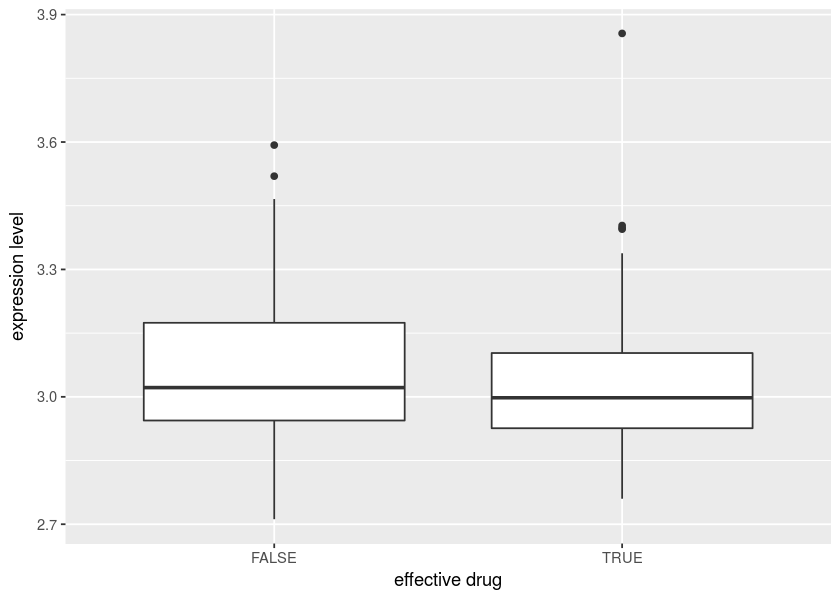

In [59]:
options(repr.plot.width=7,repr.plot.height=5)
ggplot(data=data_plot)+geom_boxplot(aes(x=EFFECT,y=EXP))+labs(x="effective drug",y="expression level")

In [61]:
cl_effect <- as.character(subset(cl_1014,EFFECT==TRUE)$CL)
cl_ineffect <- as.character(subset(cl_1014,EFFECT==FALSE)$CL)
t.test(x=gene_exp_1014[cl_effect,1],y=gene_exp_1014[cl_ineffect,1],var.equal=TRUE)


	Two Sample t-test

data:  gene_exp_1014[cl_effect, 1] and gene_exp_1014[cl_ineffect, 1]
t = 3.3348, df = 278, p-value = 0.0009698
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3179253 1.2340965
sample estimates:
mean of x mean of y 
 6.860047  6.084036 


In [ ]:
p.vec <- data.frame(GENE=colnames(gene_exp_1014),P=NA)
for(i in 1:dim(p.vec)){
    p.vec[i,2]<-t.test(x=gene_exp_1014[cl_effect,i],y=gene_exp_1014[cl_ineffect,i],var.equal=TRUE)$p.value 
}
ggplot(data=p.vec,aes(x=P))+geom_histogram()+labs(x='p-value',y='Frequency',title="P-value Histogram")